In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# unbinned chi2
def calc_chi2(yy,mean,sigma):
    chi2val = sum((yy-mean)**2 / sigma**2)
    return chi2val

In [3]:
class myhist:
    """
    A simple histogram class
    """
    
    def __init__(self, data, bins):
        """
        Constructor with bins and data.
        
        Both are arrays, but the size of bins is that of data + 1,
        because the former contains bin edges and the latter the bin contents.
        
        If no data are provided, generate some
        """
        if len(bins) != len(data) + 1:
            print("ERROR inconsistent sizes for bins and data")
            return
        
        self.bins = bins
        self.data = data
        # also store bin centers for convenience
        self.binc = [(bins[i] + bins[i+1]) / 2 for i in range(len(data))]
        # and the sum of the data
        self.tot = sum(data)
        
    # define GoF functions
    def PearsonChi2(self, model_cdf):
        """
        Pearson chi2.
        model_cdf is the cdf of the model
        """
        nbins = len(self.data)
        chi2val = 0
        ndf = 0
        for i in range(nbins):
            d = self.data[i]
            p = model_cdf(bins[i+1]) - model_cdf(bins[i])
            
            # implement chi2 here
            if p>0:
                chi2val = chi2val + (d-p)**2 / p
                ndf = ndf+1
        
        return chi2val, ndf
    
    def NeymanChi2(self, model_cdf):
        """
        Pearson chi2.
        model_cdf is the cdf of the model
        """
        nbins = len(self.data)
        chi2val = 0
        ndf = 0
        for i in range(nbins):
            d = self.data[i]
            p = model_cdf(bins[i+1]) - model_cdf(bins[i])
            
            # implement chi2 here
            if d>0:
                chi2val = chi2val + (d-p)**2 / d
                ndf = ndf+1
        
        return chi2val, ndf
    
    def BakerCousinsChi2(self, model_cdf):
        """
        Baker-Cousins chi2 (saturated model).
        model_cdf is the cdf of the model
        """
        nbins = len(self.data)
        chi2val = 0
        ndf = 0
        for i in range(nbins):
            d = self.data[i]
            p = model_cdf(bins[i+1]) - model_cdf(bins[i])
            
            # implement chi2 here
            if (p>0):
                ndf = ndf+1
                if (d>0):
                    chi2val = chi2val + 2*(p - d + d*np.log(d/p))
                else:
                    chi2val = chi2val + 2*p
        
        return chi2val, ndf

In [4]:
# chi2 to pvalue
def chi2prob(chi2val,ndf):
    return 1 - stats.chi2.cdf(chi2val, ndf)

In [5]:
# general parameters
Nbins = 20
xmin = -3
xmax = 3
Nevts = 1000

# true values of the parameters
mean0 = 0.0
sigma0 = 1.0

# derived quantities
bins = np.linspace(xmin, xmax, Nbins)
bin_width = bins[1]-bins[0]

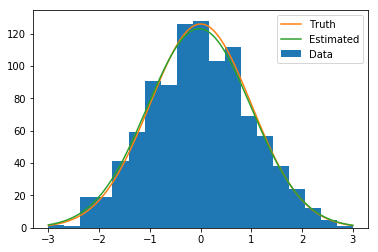

995.0


In [6]:
# generate example data
unbinned_data = np.random.normal(mean0, sigma0, Nevts)

# turn it into a histogram
n, bins, p = plt.hist(unbinned_data, bins=bins, label='Data')
testhist = myhist(n, bins)

# estimate the parameters from the data
mean_data = np.mean(unbinned_data)
sigma_data = np.std(unbinned_data, ddof=1)

# for plotting the pdf
xx = np.linspace(xmin, xmax, 1000)
yy0 = stats.norm.pdf(xx, mean0, sigma0) * Nevts * bin_width
yy_fit = stats.norm.pdf(xx, mean_data, sigma_data) * Nevts * bin_width

# draw it, with the pdf with true or fitted parameters
plt.plot(xx, yy0, label='Truth')
plt.plot(xx, yy_fit, label='Estimated')
plt.legend()
plt.show()
print(testhist.tot)

In [7]:
Ntoys=1000

# arrays to hold the values
# chi2s using true values of the parameters
chi2s0_U, chi2s0_N, chi2s0_P, chi2s0_BC = [], [], [], []
pvals0_U, pvals0_N, pvals0_P, pvals0_BC = [], [], [], []
# chi2s using estimated values of the parameters
chi2s_U, chi2s_N, chi2s_P, chi2s_BC = [], [], [], []
pvals_U, pvals_N, pvals_P, pvals_BC = [], [], [], []

model0_cdf = lambda x: stats.norm.cdf(x, mean0, sigma0) * Nevts

for i in range(0,Ntoys):
    Nevtst = np.random.poisson(Nevts)
    # Nevtst = Nevts
    toy_data = np.random.normal(mean0, sigma0, Nevtst)
    # turn it into a histogram
    n, bins = np.histogram(toy_data, bins)
    toy_hist = myhist(n, bins)
    
    # compute the chi2s and p-values with the true values of the parameters
    # unbinned
    chi2val = calc_chi2(toy_data, mean0, sigma0)
    chi2s0_U.append(chi2val)
    pvals0_U.append(chi2prob(chi2val, len(toy_data)))
    
    # Pearson
    chi2val, ndf = toy_hist.PearsonChi2(model0_cdf)
    chi2s0_P.append(chi2val)
    pvals0_P.append(chi2prob(chi2val, ndf))
    
    # Neyman
    chi2val, ndf = toy_hist.NeymanChi2(model0_cdf)
    chi2s0_N.append(chi2val)
    pvals0_N.append(chi2prob(chi2val, ndf))
    
    # Baker-Cousins
    chi2val, ndf = toy_hist.BakerCousinsChi2(model0_cdf)
    chi2s0_BC.append(chi2val)
    pvals0_BC.append(chi2prob(chi2val, ndf))
    
    # now with the estimated values
    mean_toy = np.mean(toy_data)
    sigma_toy = np.std(toy_data, ddof=1)
    model_toy_cdf = lambda x: stats.norm.cdf(x, mean_toy, sigma_toy) * Nevts
    
    chi2val = calc_chi2(toy_data, mean_toy, sigma_toy)
    chi2s_U.append(chi2val)
    pvals_U.append(chi2prob(chi2val, len(toy_data)-2))

    chi2val, ndf = toy_hist.PearsonChi2(model_toy_cdf)
    chi2s_P.append(chi2val)
    pvals_P.append(chi2prob(chi2val, ndf-2))
    
    chi2val, ndf = toy_hist.NeymanChi2(model_toy_cdf)
    chi2s_N.append(chi2val)
    pvals_N.append(chi2prob(chi2val, ndf-2))
    
    chi2val, ndf = toy_hist.BakerCousinsChi2(model_toy_cdf)
    chi2s_BC.append(chi2val)
    pvals_BC.append(chi2prob(chi2val, ndf-2))

In [15]:
# plotting
def plot_chi2(chi2s0, pvals0, chi2s, pvals, nobs, title):
    """
    Plot thie chi2 and p-values and compare them with true or estimated parameters
    """
    chi2min, chi2max = 800,1200
    xchi2 = np.linspace(chi2min, chi2max, 100)
    ychi2_pre = stats.chi2.pdf(xchi2, nobs)
    ychi2_post = stats.chi2.pdf(xchi2, nobs-2)
    xpval = np.linspace(0,1,100)
    ypval = np.full_like(xpval, 1)

    fig, ((ax1, ax2)) = plt.subplots(1,2)

    ax1.hist(chi2s0, np.linspace(chi2min, chi2max, 20), color='r', label='true params', density=True, alpha=0.7)
    ax1.hist(chi2s, np.linspace(chi2min, chi2max, 20), color='b',label='est. params', density=True, alpha=0.7)
    ax1.plot(xchi2, ychi2_pre, color='r')
    ax1.plot(xchi2, ychi2_post, color='b')
    ax1.set_xlabel(r'$\chi^2$')
    ax1.legend()

    ax2.hist(pvals0, np.linspace(0, 1, 20), color='r', label='true params', density=True, alpha=0.7)
    ax2.hist(pvals, np.linspace(0, 1, 20), color='b',label='est. params', density=True, alpha=0.7)
    ax2.plot(xpval, ypval)
    ax2.set_xlabel('p-value')
    ax2.legend()
    
    print(title)
    print("mean p-value with true parameters:", np.mean(pvals0))
    print("mean p-value with estimated parameters:", np.mean(pvals))

    plt.title(title)
    plt.tight_layout()
    plt.show()

Unbinned
mean p-value with true parameters: 0.4966007554010332
mean p-value with estimated parameters: 0.48512234457440695


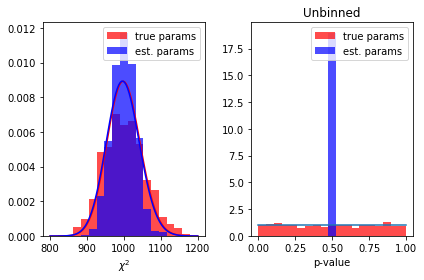

In [16]:
# Ubinned
plot_chi2(chi2s0_U, pvals0_U, chi2s_U, pvals_U, Nevts, 'Unbinned')

Pearson
mean p-value with true parameters: 0.4806040847982677
mean p-value with estimated parameters: 0.47507161016514327


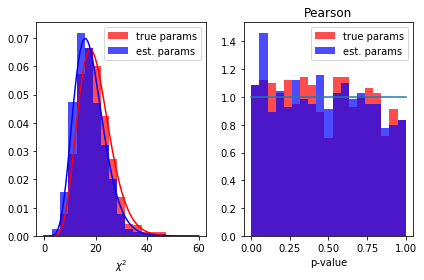

In [10]:
# Pearson
plot_chi2(chi2s0_P, pvals0_P, chi2s_P, pvals_P, Nbins, 'Pearson')

Neyman
mean p-value with true parameters: 0.44119648512254683
mean p-value with estimated parameters: 0.4370902205965244


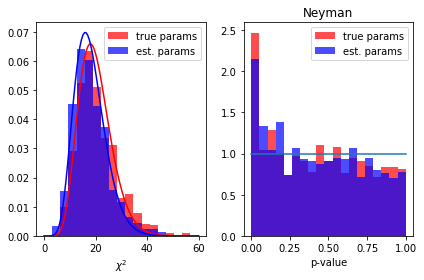

In [11]:
# Neyman
plot_chi2(chi2s0_N, pvals0_N, chi2s_N, pvals_N, Nbins, 'Neyman')

Baker-Cousins
mean p-value with true parameters: 0.45994507444423516
mean p-value with estimated parameters: 0.45463129380350414


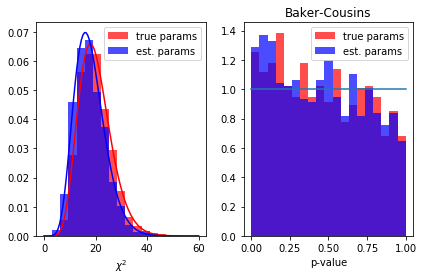

In [12]:
# Baker-Cousins
plot_chi2(chi2s0_BC, pvals0_BC, chi2s_BC, pvals_BC, Nbins, 'Baker-Cousins')

## Take-home message

The asymptotic properties of goodness-of-fit tests (especially $\chi^2$ values) are only asymptotic, and the corresponding p-values must be taken with a grain of salt, especially when some bins are empty or almost empty. The safest way to obtain the actual distribution of the statistic for a given goodness-of-fit test is to throw toys.

However, in situations when the number of entries in the histogram is finite, as well as the number of empty bins, the Baker-Cousins $\chi^2$ appears to follow the expected $\chi^2$ distribution earlier, followed by Pearson $\chi^2$, and finally Neyman $\chi^2$.